# Explore Taylor series expansion of functions using JAX jet module

Recommended reads:
- [Taylor-Mode Automatic Differentiation for Higher-Order Derivatives in JAX](https://openreview.net/forum?id=SkxEF3FNPH) by Jesse Bettencourt, Matthew J. Johnson, and David Duvenaud
- [Notes for jax.experimental.jet module](https://github.com/jax-ml/jax/files/6717197/jet.pdf)
- [Evaluating higher derivative tensors by forward propagation of univariate Taylor series](https://doi.org/10.1090/S0025-5718-00-01120-0) by Andreas Griewank, Jean Utke and Andrea Walther


In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from jax.experimental import jet

jax.config.update("jax_enable_x64", True)

## Univariate expansion

Example of Taylor series expansion of $\cos(x)$ function around $x=x_0$.

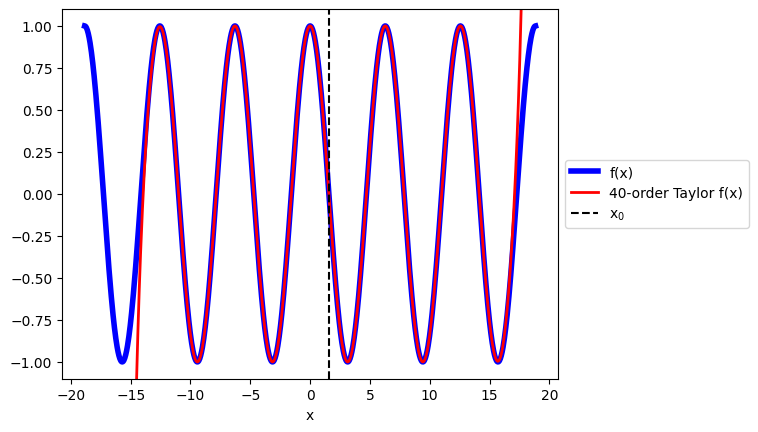

In [3]:
func = jnp.cos


def func_taylor(x, x0, c):
    """Evaluates Taylor series: sum_i c[i] / i! * (x - x0)**i"""
    dx = x - x0

    @jax.jit
    def pow(carry, i):
        dx_i, res = carry
        dx_i *= dx / i
        res = res + c[i] * dx_i
        return (dx_i, res), 0

    (_, res), _ = jax.lax.scan(
        pow, (jnp.ones_like(dx), jnp.ones_like(dx) * c[0]), jnp.arange(1, len(c))
    )
    return res


x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)

order = 40
deg = [0] * order
deg[0] = 1

x0 = np.pi / 2
c0, c = jet.jet(func, (x0,), (deg,))
c = jnp.array([c0] + c)

plt.plot(x, func(x), "b", label="f(x)", linewidth=4)
plt.plot(x, func_taylor(x, x0, c), "r", label=f"{order}-order Taylor f(x)", linewidth=2)

plt.plot([x0, x0], [-1.1, 1.1], "k--", label="x$_0$")
plt.ylim([-1.1, 1.1])
plt.xlabel("x")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# Multivariate expansion

In [28]:
# func2d = jax.vmap(lambda x: jnp.cos(x[0]) * jnp.sin(x[1]), in_axes=(0,))
func2d = lambda x1, x2: jnp.cos(x1) * jnp.sin(x2)
# func2d = lambda x: jnp.cos(x[0]) * jnp.sin(x[1])

x2d = np.linspace(-2 * np.pi, 2 * np.pi, 100)
nx = len(x2d)
x2d_1, x2d_2 = np.meshgrid(x2d, x2d, indexing="ij")
x2d = np.column_stack([x2d_1.ravel(), x2d_2.ravel()])

# f = func2d(x2d)
# print(f.shape)

order = 4
deg = [0] * order
deg[0] = 1
print(deg)

x0 = 0
# c0, c = jet.jet(func2d, (x0,x0,), (deg,deg,))
c0, c = jet.jet(func2d, (x0,x0), ((1,0),(0,1),(0,0),(0,0)) )
c = jnp.array([c0] + c)
print(c)

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection="3d")
# ax.plot_surface(
#     x2d_1,
#     x2d_2,
#     f.reshape(nx, -1),
#     cmap="gnuplot2",
#     edgecolor="black",
#     linewidth=0.1,
#     rstride=1,
#     cstride=1,
# )
# # ax.contour3D(x2d_1, x2d_2, f.reshape(nx,-1), 50, cmap="gnuplot2")
# plt.show()

[1, 0, 0, 0]
[0. 0. 1.]
